# Mini-Project 1: Data Cleaning and Analytics 
##### Jimmy Sisenglath, Eric Pham, Justin Eugenio

CSC177 Section 1 MWF 2:00PM - 2:50PM
Professor Chen                         

# 1. Data Cleaning

## Task 1.1 
- First, you need to clean up the data. Each line of the file is a tweet. Throw away all tweets
that are retweets (the text starts with RT), and from the text keep only the hashtags (words that start
with #) and the handles (words that start with @).

In [1]:
#SECTION 1.1

import pandas as pd
import numpy as np

#produces the column name title on top of the table
cols = ['Name', 'ScreenName', 'UserID', 'FollowersCount', 'FriendsCount','Location', 'Description', 'CreatedAt', 'StatusID', 'Language', 'Place', 'RetweetCount','FavoriteCount', 'Text']

#reads the text file with inserting the column title head that we created
# read_table default.
df = pd.read_csv('clinton_trump_tweets.txt', sep="\t", header=None, names=cols ,encoding= "ISO-8859-1")
pd.set_option('display.max_colwidth', -1) #shows the whole message in the records

#produces 5 first records
df.head()

,Name,ScreenName,UserID,FollowersCount,FriendsCount,Location,Description,CreatedAt,StatusID,Language,Place,RetweetCount,FavoriteCount,Text
0,Cebel,Cebel6,1519696717,132,263,"Little Rock, Arkansas",Arkansas Razorback Fan Just trying to be #Uncommon one 1-0 day at a time.,Sat Oct 29 08:10:06 EEST 2016,792232017094119425,en,NaN,0,1,@NWAJimmy I've read it now though brother. Was pretty spot on Lots of bright spots but a lot to work on. Exactly as an exhibition should be!
1,Cookie,Cookiemuffen,109945090,2154,2034,The American South,Got married after college. I don't regret starting a family instead of grad school. Proud Deplorable,Wed Oct 26 18:44:08 EEST 2016,791304413923213312,en,NaN,1937,0,RT @wikileaks: New poll puts Pirate Party on course to win Iceland's national elections on Saturday. https://t.co/edTqjeJaQ6
2,nolaguy,nolaguy_phd,1450086582,797,1188,NaN,"An LSU Ph.D student living in New Orleans, trying to find a second act.",Sat Oct 29 21:53:29 EEST 2016,792439227090767872,en,NaN,0,0,@gaystoner821 I think New Orleans spoiled me with food. I need to try and branch out in BR.
3,Mark Hager,marksnark,167177185,204,448,Pittsburgh,"Hip, trendy, smart, funny, fit, lobbyist. U? Boilerplate: these thoughts are my own, not anyone else's. Hmmmkay?",Wed Oct 26 00:33:20 EEST 2016,791029904733331457,en,NaN,891,0,RT @LOLGOP: ACA needs fixes but know da facts: *70% can get covered in marketplaces for under $75/month *Hikes affect 3% *GOP will uninsu
4,Capitalist Creations,aaronjhoddinott,1191022351,775,154,Canada,"Entrepreneur, startup investor, political junkie, free market supporter, beer connoisseur, dad and dog lover. Also a golf enthusiast despite my lack of skill.",Fri Oct 28 05:05:10 EEST 2016,791823089700962304,en,NaN,7,0,RT @FastCompany: Alphabet shares soar on better-than-expected earnings as mobile video strategy pays off https://t.co/bokbXngMJt https://t.


In [2]:
#Produce another dataframe without more than one retweet
no_retweet = df.drop(df[df.Text.str.startswith('RT')].index)

no_retweet.head()

,Name,ScreenName,UserID,FollowersCount,FriendsCount,Location,Description,CreatedAt,StatusID,Language,Place,RetweetCount,FavoriteCount,Text
0,Cebel,Cebel6,1519696717,132,263,"Little Rock, Arkansas",Arkansas Razorback Fan Just trying to be #Uncommon one 1-0 day at a time.,Sat Oct 29 08:10:06 EEST 2016,792232017094119425,en,NaN,0,1,@NWAJimmy I've read it now though brother. Was pretty spot on Lots of bright spots but a lot to work on. Exactly as an exhibition should be!
2,nolaguy,nolaguy_phd,1450086582,797,1188,NaN,"An LSU Ph.D student living in New Orleans, trying to find a second act.",Sat Oct 29 21:53:29 EEST 2016,792439227090767872,en,NaN,0,0,@gaystoner821 I think New Orleans spoiled me with food. I need to try and branch out in BR.
6,David Walling,davidjwalling,106568768,975,2781,"Dallas, TX",Bloodletting secure algorithms close to the bone. #HealthIT security matters. Opinions my own. https://t.co/Dcpe6FteOq,Sat Oct 29 00:16:48 EEST 2016,792112907488079872,en,NaN,0,0,#infosec #Intel #ACM #IEEE Impacts Haswell microarch. Paper proposes mitigations that could prevent BTB-based side https://t.co/DW6vgRAPrv
7,robert2266,robert2266,17101060,845,938,The Universe,The Dark Lord,Fri Oct 28 14:41:06 EEST 2016,791968028191711237,en,NaN,0,0,"Hacked e-mails show Clinton campaigns fears about Sanders | https://t.co/WMyCHuCDIc The Philippine Star (PhilippineStar) October 28, 2"
10,neddyo,neddyo,16818809,1400,379,Long Island and beyond...,"You should be digging it while it's happening - Zappa; I don't know how you do it, man. - Anastasio #minimix #recommNeds #NYCSOTW",Mon Oct 31 08:06:52 EET 2016,792971077836124160,en,NaN,0,1,Hulk smash!


In [3]:
#produces a dataframe with Text column that starts contains @ and #
hand_hash = no_retweet[no_retweet.Text.str.startswith(('@', '#'))]

hand_hash.head()

,Name,ScreenName,UserID,FollowersCount,FriendsCount,Location,Description,CreatedAt,StatusID,Language,Place,RetweetCount,FavoriteCount,Text
0,Cebel,Cebel6,1519696717,132,263,"Little Rock, Arkansas",Arkansas Razorback Fan Just trying to be #Uncommon one 1-0 day at a time.,Sat Oct 29 08:10:06 EEST 2016,792232017094119425,en,NaN,0,1,@NWAJimmy I've read it now though brother. Was pretty spot on Lots of bright spots but a lot to work on. Exactly as an exhibition should be!
2,nolaguy,nolaguy_phd,1450086582,797,1188,NaN,"An LSU Ph.D student living in New Orleans, trying to find a second act.",Sat Oct 29 21:53:29 EEST 2016,792439227090767872,en,NaN,0,0,@gaystoner821 I think New Orleans spoiled me with food. I need to try and branch out in BR.
6,David Walling,davidjwalling,106568768,975,2781,"Dallas, TX",Bloodletting secure algorithms close to the bone. #HealthIT security matters. Opinions my own. https://t.co/Dcpe6FteOq,Sat Oct 29 00:16:48 EEST 2016,792112907488079872,en,NaN,0,0,#infosec #Intel #ACM #IEEE Impacts Haswell microarch. Paper proposes mitigations that could prevent BTB-based side https://t.co/DW6vgRAPrv
13,Harry Binford,CaptainNormal,2447279666,895,1224,USA,"Proud Christian husband, frequent shooting range attendee, and former law enforcement. Lifetime member of the NRA. Pro-life, Jesus is Lord. America first.",Thu Oct 27 21:44:44 EEST 2016,791712249685676032,en,NaN,0,0,@WayneDupreeShow #climatechange is the democrats' attempt to play God
22,McDonald's,McDonaldsCorp,111679943,143939,11621,"Oak Brook, IL","Learn about McDonalds history, people, food, & restaurants around the world. https://t.co/JcE2O51T5F",Wed Oct 26 22:44:02 EEST 2016,791364785132695554,en,NaN,0,0,@tansleyemiley69 Drop by anytime. Well wait for you here. :)


# Task 1.2
- Remove the hashtags/handles that have been used less than 20 times. Then remove the
users that have used less than 20 tweets.

In [4]:
#creating a series from the Text column and seperating each word
def get_hand_hash(list):
    new_str = " "
    for x in list.split():
        if x.startswith('#') or x.startswith('@'):
            new_str += " " + x
    return new_str
        

hand_hash['Hand_Hash'] = hand_hash.Text.apply(get_hand_hash)

hand_hash.head()

C:\Users\JB\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,Name,ScreenName,UserID,FollowersCount,FriendsCount,Location,Description,CreatedAt,StatusID,Language,Place,RetweetCount,FavoriteCount,Text,Hand_Hash
0,Cebel,Cebel6,1519696717,132,263,"Little Rock, Arkansas",Arkansas Razorback Fan Just trying to be #Uncommon one 1-0 day at a time.,Sat Oct 29 08:10:06 EEST 2016,792232017094119425,en,NaN,0,1,@NWAJimmy I've read it now though brother. Was pretty spot on Lots of bright spots but a lot to work on. Exactly as an exhibition should be!,@NWAJimmy
2,nolaguy,nolaguy_phd,1450086582,797,1188,NaN,"An LSU Ph.D student living in New Orleans, trying to find a second act.",Sat Oct 29 21:53:29 EEST 2016,792439227090767872,en,NaN,0,0,@gaystoner821 I think New Orleans spoiled me with food. I need to try and branch out in BR.,@gaystoner821
6,David Walling,davidjwalling,106568768,975,2781,"Dallas, TX",Bloodletting secure algorithms close to the bone. #HealthIT security matters. Opinions my own. https://t.co/Dcpe6FteOq,Sat Oct 29 00:16:48 EEST 2016,792112907488079872,en,NaN,0,0,#infosec #Intel #ACM #IEEE Impacts Haswell microarch. Paper proposes mitigations that could prevent BTB-based side https://t.co/DW6vgRAPrv,#infosec #Intel #ACM #IEEE
13,Harry Binford,CaptainNormal,2447279666,895,1224,USA,"Proud Christian husband, frequent shooting range attendee, and former law enforcement. Lifetime member of the NRA. Pro-life, Jesus is Lord. America first.",Thu Oct 27 21:44:44 EEST 2016,791712249685676032,en,NaN,0,0,@WayneDupreeShow #climatechange is the democrats' attempt to play God,@WayneDupreeShow #climatechange
22,McDonald's,McDonaldsCorp,111679943,143939,11621,"Oak Brook, IL","Learn about McDonalds history, people, food, & restaurants around the world. https://t.co/JcE2O51T5F",Wed Oct 26 22:44:02 EEST 2016,791364785132695554,en,NaN,0,0,@tansleyemiley69 Drop by anytime. Well wait for you here. :),@tansleyemiley69


In [5]:
#created a long string series of all the values in Hand_Hash
total_hash_hand = pd.Series(hand_hash.Hand_Hash.str.cat(sep=' ').split())

#created top_hash_hand to get total number of of the total value count of used hashtags and handlers
top_hash_hand = total_hash_hand.value_counts()

top_hash_hand

@realDonaldTrump     23155
@HillaryClinton      17255
@FoxNews             9426 
@megynkelly          7000 
@CNN                 6564 
@YouTube             4193 
@newtgingrich        4093 
#NowPlaying          4040 
@seanhannity         3729 
@                    3492 
#Now                 3431 
@wikileaks           3281 
@KellyannePolls      3197 
#news                3158 
@washingtonpost      3030 
@IAMDONMEGA1017      3016 
#SPOTIFY             3015 
#ALBUM               3015 
#DOWNLOAD            3015 
@MSNBC               2851 
@FBI                 2703 
#YOUNGMA             2658 
@nytimes             2651 
@POTUS               2522 
@JoyAnnReid          2493 
@jasoninthehouse     2457 
@ABC                 2354 
#LGBT                2354 
#Trump               2314 
@mitchellvii         2128 
                     ...  
@Cristina_0729       1    
@jstyy               1    
@cafe57hearst        1    
@Ms_Historian        1    
@danielotto          1    
@stuffedskullcat     1    
@

In [6]:
#prints out hashtags and handler that occurs more or equal to 20 times
top_hash_hand_list = top_hash_hand[top_hash_hand>=20]

top_hash_hand_list

@realDonaldTrump         23155
@HillaryClinton          17255
@FoxNews                 9426 
@megynkelly              7000 
@CNN                     6564 
@YouTube                 4193 
@newtgingrich            4093 
#NowPlaying              4040 
@seanhannity             3729 
@                        3492 
#Now                     3431 
@wikileaks               3281 
@KellyannePolls          3197 
#news                    3158 
@washingtonpost          3030 
@IAMDONMEGA1017          3016 
#SPOTIFY                 3015 
#ALBUM                   3015 
#DOWNLOAD                3015 
@MSNBC                   2851 
@FBI                     2703 
#YOUNGMA                 2658 
@nytimes                 2651 
@POTUS                   2522 
@JoyAnnReid              2493 
@jasoninthehouse         2457 
@ABC                     2354 
#LGBT                    2354 
#Trump                   2314 
@mitchellvii             2128 
                         ...  
@MayorGimenez            20   
@malleli

In [7]:
#function for including all the most frequent hashtags and handlers and return back an empty string for ones that aren't
def get_top_hash(s):
    new_str = " "
    for i in s.split():
        if i in top_hash_hand_list:
            new_str += " " + i
    return new_str

#creating a new column in hand_hash dataframe
hand_hash['TopHash'] = hand_hash.Hand_Hash.apply(get_top_hash)

hand_hash

C:\Users\JB\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,Name,ScreenName,UserID,FollowersCount,FriendsCount,Location,Description,CreatedAt,StatusID,Language,Place,RetweetCount,FavoriteCount,Text,Hand_Hash,TopHash
0,Cebel,Cebel6,1519696717,132,263,"Little Rock, Arkansas",Arkansas Razorback Fan Just trying to be #Uncommon one 1-0 day at a time.,Sat Oct 29 08:10:06 EEST 2016,792232017094119425,en,NaN,0,1,@NWAJimmy I've read it now though brother. Was pretty spot on Lots of bright spots but a lot to work on. Exactly as an exhibition should be!,@NWAJimmy,
2,nolaguy,nolaguy_phd,1450086582,797,1188,NaN,"An LSU Ph.D student living in New Orleans, trying to find a second act.",Sat Oct 29 21:53:29 EEST 2016,792439227090767872,en,NaN,0,0,@gaystoner821 I think New Orleans spoiled me with food. I need to try and branch out in BR.,@gaystoner821,
6,David Walling,davidjwalling,106568768,975,2781,"Dallas, TX",Bloodletting secure algorithms close to the bone. #HealthIT security matters. Opinions my own. https://t.co/Dcpe6FteOq,Sat Oct 29 00:16:48 EEST 2016,792112907488079872,en,NaN,0,0,#infosec #Intel #ACM #IEEE Impacts Haswell microarch. Paper proposes mitigations that could prevent BTB-based side https://t.co/DW6vgRAPrv,#infosec #Intel #ACM #IEEE,#infosec
13,Harry Binford,CaptainNormal,2447279666,895,1224,USA,"Proud Christian husband, frequent shooting range attendee, and former law enforcement. Lifetime member of the NRA. Pro-life, Jesus is Lord. America first.",Thu Oct 27 21:44:44 EEST 2016,791712249685676032,en,NaN,0,0,@WayneDupreeShow #climatechange is the democrats' attempt to play God,@WayneDupreeShow #climatechange,@WayneDupreeShow #climatechange
22,McDonald's,McDonaldsCorp,111679943,143939,11621,"Oak Brook, IL","Learn about McDonalds history, people, food, & restaurants around the world. https://t.co/JcE2O51T5F",Wed Oct 26 22:44:02 EEST 2016,791364785132695554,en,NaN,0,0,@tansleyemiley69 Drop by anytime. Well wait for you here. :),@tansleyemiley69,
25,Bru,thatoaklandkid,211144375,338,1152,"The Town, The 510, Oakland BB",I like to play records at parties and give people tours of Oakland. Preferably both at the same time. @loweredex,Wed Oct 26 04:51:53 EEST 2016,791094969410854912,en,NaN,0,0,@MamaDurant @KDTrey5 @NBA @warriors @Oakland @ESPNNBA @NBAonTNT @espn so excited to have you both in our city! Go dubs!,@MamaDurant @KDTrey5 @NBA @warriors @Oakland @ESPNNBA @NBAonTNT @espn,@KDTrey5 @NBA @warriors @ESPNNBA @NBAonTNT @espn
27,Bryan Vehonsky,Bryan_Vehonsky,17547533,1369,1533,"Columbus, OH",Just living this life one day at a time.,Fri Oct 28 20:17:08 EEST 2016,792052592151003137,en,NaN,0,0,@KyleOrl @ZekeJMiller Has to be something from Wikileaks right? But if Wikileaks had the smoking gun I feel like we'd have heard by now,@KyleOrl @ZekeJMiller,@ZekeJMiller
28,Andrea Rosu,Andrea_Rosu,2263109930,9767,693,"San Francisco, CA","Fetish and Erotic Model, Creator and lover of smut, creator and lover of art. For custom requests: info@andrearosu.com",Fri Oct 28 23:52:31 EEST 2016,792106796043210753,en,NaN,0,0,@MutinyWrestling I know!! Ill let you know if I can make it work,@MutinyWrestling,
33,BIG MARV,BIGGMARV,15627940,49331,34131,"OAKLAND,CA","IM BIGG MARV,MC HAMMER'S COUSIN FROM THE NEW HIT A&E TV SERIES HAMMERTIME!& THE PRESIDENT OF THE BOARD @ HODGE PODGE THE CENTER FOR TEENS.",Mon Oct 31 01:34:11 EET 2016,792872257315966976,en,NaN,2,4,@Timberland !!!Store #305 just took great care of me & they're doing a wonderful JOB!!! AS WELL!!! https://t.co/DvTarQcHPv,@Timberland #305,
34,My Info,chrisf91,2424856262,129,822,"San Antonio, TX","im not supersticous, but... i am a little sticious...",Fri Oct 28 09:34:20 EEST 2016,791890827974840322,en,NaN,0,0,"@mlombardifoxtv its ok to admit bill bellichick cusses out his players! Hey @ochocinco this dude dont beleive u, hes all on pats nuts.",@mlombardifoxtv @ochocinco,@ochocinco


In [8]:
#shortened dataframe with 3 columns making it easier to review and read
new_hand_hash = hand_hash[['Name', 'UserID', 'Location', 'TopHash']]

new_hand_hash

,Name,UserID,Location,TopHash
0,Cebel,1519696717,"Little Rock, Arkansas",
2,nolaguy,1450086582,NaN,
6,David Walling,106568768,"Dallas, TX",#infosec
13,Harry Binford,2447279666,USA,@WayneDupreeShow #climatechange
22,McDonald's,111679943,"Oak Brook, IL",
25,Bru,211144375,"The Town, The 510, Oakland BB",@KDTrey5 @NBA @warriors @ESPNNBA @NBAonTNT @espn
27,Bryan Vehonsky,17547533,"Columbus, OH",@ZekeJMiller
28,Andrea Rosu,2263109930,"San Francisco, CA",
33,BIG MARV,15627940,"OAKLAND,CA",
34,My Info,2424856262,"San Antonio, TX",@ochocinco


In [9]:
#removing all the empty strings in Top Hash
final_hand_hash = new_hand_hash[new_hand_hash.TopHash!=" "]

final_hand_hash

,Name,UserID,Location,TopHash
6,David Walling,106568768,"Dallas, TX",#infosec
13,Harry Binford,2447279666,USA,@WayneDupreeShow #climatechange
25,Bru,211144375,"The Town, The 510, Oakland BB",@KDTrey5 @NBA @warriors @ESPNNBA @NBAonTNT @espn
27,Bryan Vehonsky,17547533,"Columbus, OH",@ZekeJMiller
34,My Info,2424856262,"San Antonio, TX",@ochocinco
51,EmmaPeel,180304807,emma w/2 underscores,@KrisBryant_23 #FlyTheW #WorldSeries
52,Laura,17235735,"London, Ontario, Canada",@NaNoWriMo
56,Jody Taylor,1480641168,NaN,@ZekeJMiller
66,graceblue,16430972,Undercover reviewer,@HeatherDubrow
76,Bernard Silverman,22897055,"Dallas, TX",@paulkrugman


In [10]:
#creates a series that shows the total number of tweets a user posted
user_count = final_hand_hash.groupby('UserID').UserID.count().sort_values(ascending = False)

user_count

UserID
1971604699    3016
1463096012    2654
1722976068    1717
1592314058    1712
242017731     1634
2328069194    1535
129865493     1311
1535902620    1119
1140594793    1074
2215753303    954 
228805804     946 
153860022     913 
1493419507    890 
249880957     875 
107742714     794 
235337115     694 
1965774102    676 
231570992     673 
180058006     671 
121403596     656 
14437333      628 
2324027460    625 
19644086      625 
151552315     620 
235673247     608 
2496180434    601 
22897055      601 
1450257787    598 
218479755     574 
153218852     547 
             ...  
111533118     1   
111612434     1   
1327173264    1   
111671599     1   
111677983     1   
111683344     1   
1326910454    1   
1328112181    1   
1328403788    1   
111161865     1   
1329980101    1   
1330303561    1   
1330264999    1   
111185834     1   
1330133695    1   
111194397     1   
111202646     1   
111206460     1   
1330042808    1   
111284775     1   
1328441498    1   
13295

In [11]:
#prints out users who have tweeted more than or equal to 20 times
top_users = user_count[user_count>=20]

top_users

UserID
1971604699    3016
1463096012    2654
1722976068    1717
1592314058    1712
242017731     1634
2328069194    1535
129865493     1311
1535902620    1119
1140594793    1074
2215753303    954 
228805804     946 
153860022     913 
1493419507    890 
249880957     875 
107742714     794 
235337115     694 
1965774102    676 
231570992     673 
180058006     671 
121403596     656 
14437333      628 
2324027460    625 
19644086      625 
151552315     620 
235673247     608 
2496180434    601 
22897055      601 
1450257787    598 
218479755     574 
153218852     547 
             ...  
135052785     20  
18191935      20  
2311288523    20  
20402329      20  
242440672     20  
2387168009    20  
2189467173    20  
2194879578    20  
227219544     20  
195466555     20  
2194449554    20  
17303943      20  
227171179     20  
1633710601    20  
229715163     20  
22036532      20  
15976044      20  
148459836     20  
1501882452    20  
1287506598    20  
147375045     20  
16224

In [12]:
#create a new dataframe that takes in the old dataframe with a condition of having the popular users with more than 20 tweets
final_top_users = final_hand_hash[final_hand_hash.UserID.isin(top_users.index)]

final_top_users

,Name,UserID,Location,TopHash
6,David Walling,106568768,"Dallas, TX",#infosec
13,Harry Binford,2447279666,USA,@WayneDupreeShow #climatechange
34,My Info,2424856262,"San Antonio, TX",@ochocinco
51,EmmaPeel,180304807,emma w/2 underscores,@KrisBryant_23 #FlyTheW #WorldSeries
52,Laura,17235735,"London, Ontario, Canada",@NaNoWriMo
56,Jody Taylor,1480641168,NaN,@ZekeJMiller
66,graceblue,16430972,Undercover reviewer,@HeatherDubrow
76,Bernard Silverman,22897055,"Dallas, TX",@paulkrugman
107,JK,21614788,"IL, FL, WA & now OR",@FoxNews
140,The Latest News,1463096012,NaN,#politics #news


# 2. Data Analysis by Visualization

In [13]:
#filtering top 30 locations with the most tweets
loc = final_top_users.groupby('Location').Location.count().sort_values(ascending=False)
#update an index with unique values 3-33 which is 30 records, taking out United States, USA, and WORLDNATION
top_loc = loc[3:33]

top_loc

Location
Las Vegas, NV                    2165
Baltimore, MD                    1942
Florida, USA                     1798
Jacksonville                     1717
Atl  Columbia Dallas Houston     1712
Boston, MA                       1548
California, USA                  1466
New York, USA                    1444
Washington, DC                   1373
Los Angeles, CA                  1255
Texas Hill Country               1242
Houston, TX                      1210
Chicago                          1185
Canada                           1169
Florida                          1133
New York, NY                     1131
Texas                            1127
Virginia, USA                    1063
New York                         1060
Arizona                          1014
Portland, Oregon                 976 
California                       976 
New Jersey, USA                  949 
Philadelphia, PA                 948 
International                    946 
Vancouver, Washington            913 
Mic

# Task 2.1
- Plot the number of the tweets against top-30 locations with the most tweets.

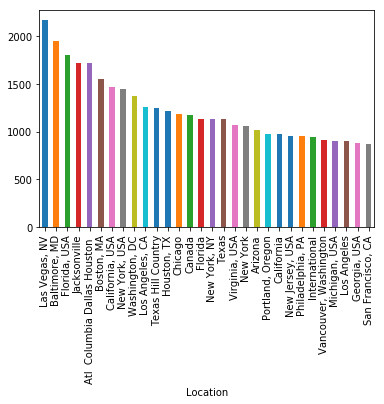

In [14]:
# A magic command to enable matplotlib figures in notebook!!!
%matplotlib inline 

# import
import matplotlib.pyplot as plt

#plot the top 30 locations
top_loc_plot = top_loc.plot(kind='bar')

top_loc_plot

# Task 2.2
- Show the respective tweet word clouds of the top-3 locations with the most tweets.

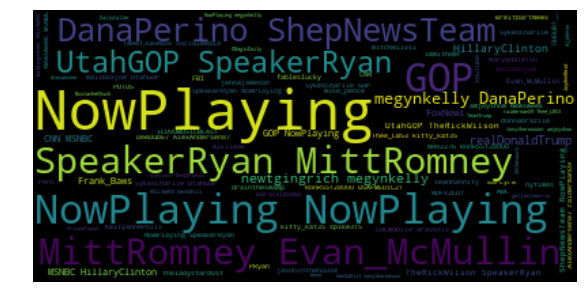

In [15]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

#created a new dataframe with the top 3 locations only
top_three_loc = final_top_users[final_top_users.Location.isin(top_loc[:3].index)]

#makes a string with all the records of TopHash from all the three locations
three_loc = top_three_loc.TopHash.to_string(index=False)

# Create and generate a word cloud object:
wordcloud = WordCloud().generate(three_loc)

# Display the generated image:
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')  #  bilinear interpolation performs linear interpolation in 2D space. 
plt.axis("off")
plt.show()

# Task 2.3
- Plot the number of the tweets against top-50 users with the most tweets.

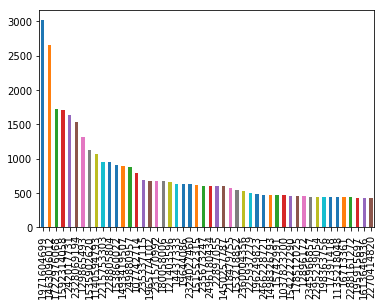

In [16]:
#created a dataframe that counts all the UserID that has appeared
fifty_users = final_top_users.UserID.value_counts().sort_values(ascending=False)

#printed out the top 50 users that has the most tweets
fifty_users = fifty_users[:50]

fifty_users_plot = fifty_users.plot(kind="bar")

# Task 2.4
- Show the respective tweet word clouds of the top-3 users with the most tweets.

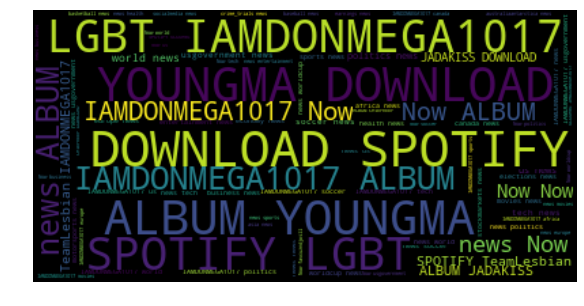

In [17]:
#new dataframe that has the top 3 users with the most tweets
top_three_users = final_top_users[final_top_users.UserID.isin(fifty_users[:3].index)]

#create a string with all the TopHash values from the top 3 users who tweets the most
three_users = top_three_users.TopHash.to_string(index=False)

# Create and generate a word cloud object:
wordcloud = WordCloud().generate(three_users)

# Display the generated image:
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')  #  bilinear interpolation performs linear interpolation in 2D space. 
plt.axis("off")
plt.show()

# Task 2.5
- Plot the occurrences of the top-100 most frequent hashtags/handles in the cleaned data

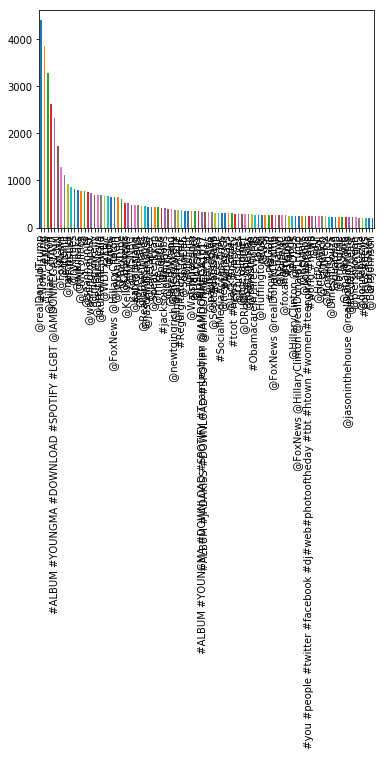

In [18]:
#created a new dataframe that has the total amount handlers and hashtags have been used
hundred_hash = final_top_users.TopHash.value_counts().sort_values(ascending=False)

#compressed the TopHash to the top 100 handlers and hashtags that have been used the most
hundred_hash = hundred_hash[:100]

hundred_hash_plot = hundred_hash.plot(kind="bar")

# Task 2.6
- Show the tweet word cloud of all the hashtags/handles in the cleaned data

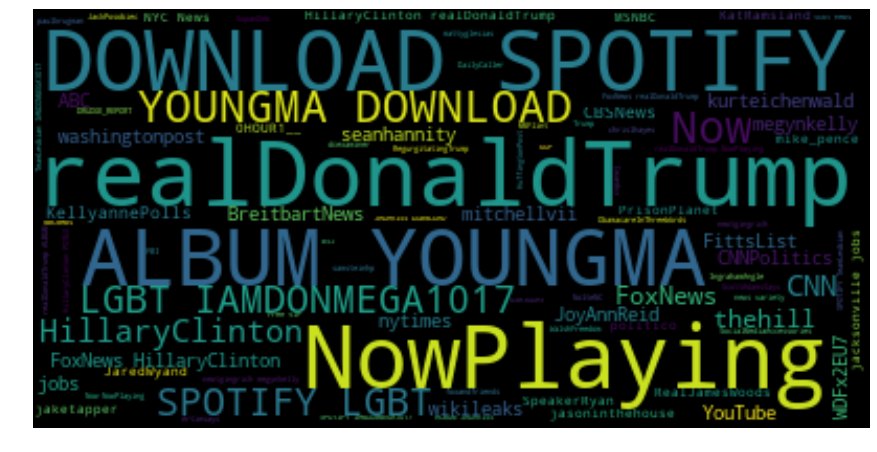

In [19]:
#created a dataframe that reads the top 100 most handlers and hashtags
top_hash = final_top_users[final_top_users.TopHash.isin(hundred_hash.index)]

#creates a string of the top handlers and hashtags
top_hash_cloud = top_hash.TopHash.to_string(index=False)

# Create and generate a word cloud object:
wordcloud = WordCloud().generate(top_hash_cloud)

# Display the generated image:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')  #  bilinear interpolation performs linear interpolation in 2D space. 
plt.axis("off")
plt.show()

In [ ]:
hand_hash.to_csv("cleaned_data.csv")